# MACS 30200
PS3

Part 2

Jie Heng

5/16/2018

In [34]:
# data
from keras.datasets import mnist
from keras.datasets import boston_housing
# packages
import matplotlib.pyplot as plt
import numpy as np
import random
from keras import models
# from keras.models import Sequential
# from keras.layers import Dense
from keras import layers
# from keras.layers import Dropout
from keras.utils import np_utils
from keras.regularizers import l1, l2
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import random
random.seed(1234)

In [2]:
# import data
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Normalize the data# Normal 
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std 

test_data -= mean
test_data /= std

### Model1(book)

In [3]:
# build a two layer model(model in book)
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    return model

In [6]:
k = 10
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [7]:
for i in range(k):
    print('fold', i,'is processing')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    mse = history.history['mean_squared_error']    
    all_scores.append(mse)

fold 0 is processing
fold 1 is processing
fold 2 is processing
fold 3 is processing
fold 4 is processing
fold 5 is processing
fold 6 is processing
fold 7 is processing
fold 8 is processing
fold 9 is processing


In [19]:
print('Base model', np.mean(all_scores))

Base model 8.392179668827088


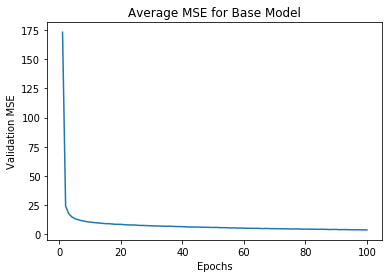

In [15]:
average_mse_m1  = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mse_m1) + 1), average_mse_m1)
plt.title('Figure1 Average MSE for Base Model')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

### Model2 (Drop)

In [16]:
def build_m2 ():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    return model

In [17]:
all_scores2 = []
for i in range(k):
    print('fold', i,'is processing')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model2 = build_m2()
    history2 = model2.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    mse = history2.history['mean_squared_error']    
    all_scores2.append(mse)

fold 0 is processing
fold 1 is processing
fold 2 is processing
fold 3 is processing
fold 4 is processing
fold 5 is processing
fold 6 is processing
fold 7 is processing
fold 8 is processing
fold 9 is processing


In [18]:
print('Drop out model', np.mean(all_scores2))

Drop out model 38.081339103650635


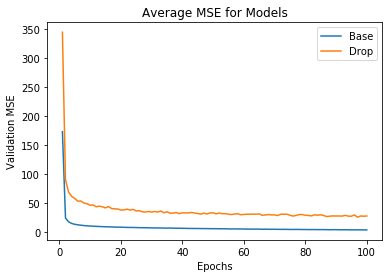

In [26]:
average_mse_m2  = [np.mean([x[i] for x in all_scores2]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mse_m1) + 1), average_mse_m1)
plt.plot(range(1, len(average_mse_m2) + 1), average_mse_m2)
plt.title('Figure2 Average MSE for Models(1-2)')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend(['Base', 'Drop'])
plt.show()

### Model3 (l2)

In [68]:
def build_m3():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],),kernel_regularizer=l2(0.001)))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    return model

In [70]:
all_scores3 = []
for i in range(k):
    print('fold', i,'is processing')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model3 = build_m3()
    history3 = model3.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    mse = history3.history['mean_squared_error']    
    all_scores3.append(mse)

fold 0 is processing
fold 1 is processing
fold 2 is processing
fold 3 is processing
fold 4 is processing
fold 5 is processing
fold 6 is processing
fold 7 is processing
fold 8 is processing
fold 9 is processing


In [72]:
print('L2 model', np.mean(all_scores3))

L2 model 8.483422913221764


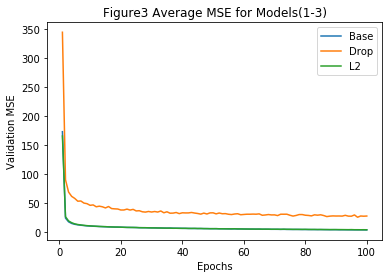

In [73]:
average_mse_m3  = [np.mean([x[i] for x in all_scores3]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mse_m1) + 1), average_mse_m1)
plt.plot(range(1, len(average_mse_m2) + 1), average_mse_m2)
plt.plot(range(1, len(average_mse_m3) + 1), average_mse_m3)
plt.title('Figure3 Average MSE for Models(1-3)')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend(['Base', 'Drop', 'L2'])
plt.show()

### Model 4 (l1)

In [74]:
def build_m4():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],),kernel_regularizer=l1(0.001)))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=l1(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    return model

In [75]:
all_scores4 = []
for i in range(k):
    print('fold', i,'is processing')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model4 = build_m4()
    history4 = model4.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    mse = history4.history['mean_squared_error']    
    all_scores4.append(mse)

fold 0 is processing
fold 1 is processing
fold 2 is processing
fold 3 is processing
fold 4 is processing
fold 5 is processing
fold 6 is processing
fold 7 is processing
fold 8 is processing
fold 9 is processing


In [76]:
print('L1 model', np.mean(all_scores4))

L1 model 8.74756530968856


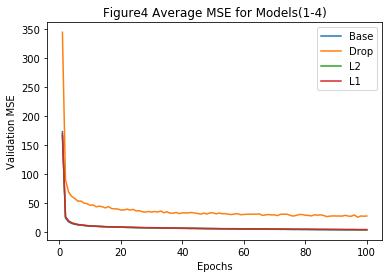

In [77]:
average_mse_m4  = [np.mean([x[i] for x in all_scores4]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mse_m1) + 1), average_mse_m1)
plt.plot(range(1, len(average_mse_m2) + 1), average_mse_m2)
plt.plot(range(1, len(average_mse_m3) + 1), average_mse_m3)
plt.plot(range(1, len(average_mse_m4) + 1), average_mse_m4)
plt.title('Figure4 Average MSE for Models(1-4)')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend(['Base', 'Drop', 'L2','L1'])
plt.show()

Apparently, drop out model is the worst among the four models.Next step, Let's do more things to compare Base, L1 and L2

In [78]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    
    return smoothed_points

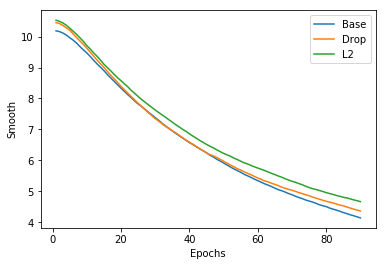

In [80]:
smooth_base= smooth_curve(average_mse_m1[10:])
smooth_l2= smooth_curve(average_mse_m3[10:])
smooth_l1= smooth_curve(average_mse_m4[10:])
plt.plot(range(1, len(smooth_base) + 1), smooth_base)
plt.plot(range(1, len(smooth_l2) + 1), smooth_l2)
plt.plot(range(1, len(smooth_l1) + 1), smooth_l1)
plt.xlabel('Epochs')
plt.ylabel('Smooth')
plt.legend(['Base','Drop','L2','L1'])
plt.show()

Thus, I choose Base model as my final model.

### Final Model

In [83]:
c = history.history['mean_squared_error'].index(min(history.history['mean_squared_error']))+1

In [87]:
model = build_model()
model.fit(train_data, train_targets, epochs=c, batch_size=5, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 1s 6ms/step


In [88]:
test_mse_score

10.812836216945275